# K - Nearest Neighbors

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step1: Get the Data

In [2]:
df = pd.read_csv('FeatureEngineering.csv')
df.head()

,Date,f1_day,f1_weekday,f1_month,AAPL_label,MSFT_label,INTC_label,ORCL_label,CSCO_label,IBM_label,...,AAPL_cat_ret,MSFT_cat_ret,INTC_cat_ret,ORCL_cat_ret,CSCO_cat_ret,IBM_cat_ret,NVDA_cat_ret,TXN_cat_ret,QCOM_cat_ret,ADBE_cat_ret
0,2006-06-28,28,2,6,b. -2.5% to -1.5%,e. 0.5% to 1.5%,g. 2.5% to inf,e. 0.5% to 1.5%,d. -0.5% to 0.5%,d. -0.5% to 0.5%,...,DUDD,UUDD,UUUD,UUDD,DUDU,DUDD,DUDD,DUDD,DUDU,UUDU
1,2006-06-29,29,3,6,g. 2.5% to inf,e. 0.5% to 1.5%,g. 2.5% to inf,e. 0.5% to 1.5%,g. 2.5% to inf,e. 0.5% to 1.5%,...,DUDD,UUDD,UUUD,UUUD,UDUD,UDUD,UDUD,UDDD,DDUD,DUUD
2,2006-06-30,30,4,6,a. -inf to -2.5%,c. -1.5% to -0.5%,b. -2.5% to -1.5%,b. -2.5% to -1.5%,b. -2.5% to -1.5%,c. -1.5% to -0.5%,...,DUDD,UUUD,UDUD,DUUD,DDDD,DDDD,UDUD,UDDD,UDUD,DUUD
3,2006-07-03,3,0,7,e. 0.5% to 1.5%,f. 1.5% to 2.5%,f. 1.5% to 2.5%,f. 1.5% to 2.5%,f. 1.5% to 2.5%,f. 1.5% to 2.5%,...,DUUD,UUUD,UUUD,UUUD,UDUD,UDUD,UDUD,UDUD,DDUD,DUDD
4,2006-07-05,5,2,7,b. -2.5% to -1.5%,c. -1.5% to -0.5%,a. -inf to -2.5%,b. -2.5% to -1.5%,b. -2.5% to -1.5%,d. -0.5% to 0.5%,...,DDDD,UUUD,UDUD,UUUD,UDUD,UDUD,UDUD,UDUD,DDUD,DUUD


# Step 2: Model Ready Data

In [3]:
#Investing in Apple
df.drop(['MSFT_label','INTC_label','ORCL_label','CSCO_label','IBM_label','NVDA_label','TXN_label','QCOM_label','ADBE_label',
         'AAPL','MSFT','INTC','ORCL','CSCO','IBM','NVDA','TXN','QCOM','ADBE',
         'MSFT_ret','INTC_ret','ORCL_ret','CSCO_ret','IBM_ret','NVDA_ret','TXN_ret','QCOM_ret','ADBE_ret'],axis=1,inplace=True)

df.set_index('Date', inplace=True)
df.head()

,f1_day,f1_weekday,f1_month,AAPL_label,AAPL_ret,AAPL_r1,MSFT_r1,INTC_r1,ORCL_r1,CSCO_r1,...,AAPL_cat_ret,MSFT_cat_ret,INTC_cat_ret,ORCL_cat_ret,CSCO_cat_ret,IBM_cat_ret,NVDA_cat_ret,TXN_cat_ret,QCOM_cat_ret,ADBE_cat_ret
Date,,,,,,,,,,,,,,,,,,,,,
2006-06-28,28,2,6,b. -2.5% to -1.5%,-0.024858,-0.026801,0.001751,-0.012662,-0.011656,-0.015424,...,DUDD,UUDD,UUUD,UUDD,DUDU,DUDD,DUDD,DUDD,DUDU,UUDU
2006-06-29,29,3,6,g. 2.5% to inf,0.051320,-0.024858,0.013038,0.033237,0.005502,0.004137,...,DUDD,UUDD,UUUD,UUUD,UDUD,UDUD,UDUD,UDDD,DDUD,DUUD
2006-06-30,30,4,6,a. -inf to -2.5%,-0.029252,0.051320,0.013305,0.034753,0.010914,0.026981,...,DUDD,UUUD,UDUD,DUUD,DDDD,DDDD,UDUD,UDDD,UDUD,DUUD
2006-07-03,3,0,7,e. 0.5% to 1.5%,0.011804,-0.029252,-0.007278,-0.016697,-0.017106,-0.019270,...,DUUD,UUUD,UUUD,UUUD,UDUD,UDUD,UDUD,UDUD,DDUD,DUDD
2006-07-05,5,2,7,b. -2.5% to -1.5%,-0.016503,0.011804,0.017022,0.018770,0.021844,0.023781,...,DDDD,UUUD,UDUD,UUUD,UDUD,UDUD,UDUD,UDUD,DDUD,DUUD


In [4]:
cat_feats = ['AAPL_cat_ret','MSFT_cat_ret','INTC_cat_ret','ORCL_cat_ret','CSCO_cat_ret',
             'IBM_cat_ret','NVDA_cat_ret','TXN_cat_ret','QCOM_cat_ret','ADBE_cat_ret']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

# Step 3: Train Test Split

In [5]:
x = final_data.drop(['AAPL_label','AAPL_ret'],axis=1)
y = final_data['AAPL_label']

x_train = x.loc['2009-01-01':'2016-12-31']
x_test  = x.loc['2014-01-01':'2016-12-31']
y_train = y.loc['2009-01-01':'2016-12-31']
y_test  = y.loc['2014-01-01':'2016-12-31']

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2014 entries, 2009-01-02 to 2016-12-30
Columns: 203 entries, f1_day to ADBE_cat_ret_UUUU
dtypes: float64(50), int64(3), uint8(150)
memory usage: 1.1+ MB


# Step 4: Building the Model (Decision Trees)

In [9]:
error_rate = []
for i in range(1,51):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0.25,0.5,'We get a reverse elbow because the backtest period is a part of training dataset \n It stabilized at k=10 \n For k<10 there are chances of overfitting')

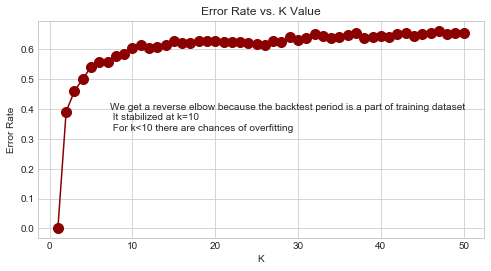

In [16]:
plt.figure(figsize=(8,4))
plt.plot(range(1,51),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.figtext(.25, .5, "We get a reverse elbow because the backtest period is a part of training dataset \n It stabilized at k=10 \n For k<10 there are chances of overfitting")

# Step 5: Predictions and Evaluation

In [17]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [18]:
y_pred = knn.predict(x_test)

print('classification_report')
print(classification_report(y_test,y_pred))
print('\n')
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred))

classification_report
                   precision    recall  f1-score   support

 a. -inf to -2.5%       0.22      0.11      0.15        35
b. -2.5% to -1.5%       0.21      0.12      0.15        51
c. -1.5% to -0.5%       0.40      0.41      0.41       143
 d. -0.5% to 0.5%       0.43      0.71      0.54       253
  e. 0.5% to 1.5%       0.35      0.26      0.30       181
  f. 1.5% to 2.5%       0.00      0.00      0.00        60
   g. 2.5% to inf       0.27      0.09      0.14        33

      avg / total       0.34      0.40      0.35       756



confusion_matrix
[[  4   2   7  14   6   0   2]
 [  2   6   6  24  12   1   0]
 [  1   2  59  61  17   1   2]
 [  1   7  33 180  29   0   3]
 [  6   8  22  97  47   0   1]
 [  2   3  13  28  14   0   0]
 [  2   1   8  10   8   1   3]]
